In [1]:
! pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 19.8MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly

# 1.Считываем данные

In [3]:
df = pd.read_excel('./Dannye.xlsx')

In [4]:
df.head()

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1,1,1,103,0,harpy.co
1,1,1,2,0,2,harpy.co
2,1,1,3,0,4,harpy.co
3,1,1,4,0,5,harpy.co
4,1,1,5,0,13,harpy.co


In [5]:
df.tail()

,unsullen.id,production.date,report.date,produced,defects,supplier
2695,100,5,5,109,0,westeros.inc
2696,100,5,6,0,11,westeros.inc
2697,100,5,7,0,6,westeros.inc
2698,100,6,6,110,0,westeros.inc
2699,100,6,7,0,11,westeros.inc


In [6]:
df.shape

(2700, 6)

Одинаковое количество данных по Harpy&Co и Westeros Inc

In [7]:
df['supplier'].value_counts()

harpy.co        1350
westeros.inc    1350
Name: supplier, dtype: int64

# 2. В датасеты df_westeros и df_harpy разделяем данные

In [8]:
df_westeros = df[df['supplier'] == 'westeros.inc']

In [9]:
df_westeros.shape

(1350, 6)

In [10]:
df_harpy = df[df['supplier'] == 'harpy.co']

In [11]:
df_harpy.shape

(1350, 6)

# 3. Информация о компании Harpy&Co

Удалим столбцы 'report.date' и 'production.date'

In [12]:
df1 = df_harpy
df_tmp1 = df1.drop(columns=['report.date', 'production.date'])

In [13]:
df_tmp1.head()

,unsullen.id,produced,defects,supplier
0,1,103,0,harpy.co
1,1,0,2,harpy.co
2,1,0,4,harpy.co
3,1,0,5,harpy.co
4,1,0,13,harpy.co


И сгруппируем по столбцу 'unsullen.id' и просуммируем

In [14]:
df_tmp1 = df_tmp1.groupby(['unsullen.id']).sum()

In [15]:
df_tmp1.head()

,produced,defects
unsullen.id,,
1,633,120
2,625,122
3,621,117
4,633,119
5,634,127


In [16]:
produced = np.array(df_tmp1['produced'].values)
defects_harpy = np.array(df_tmp1['defects'].values)
defect_percent = np.around(defects_harpy/produced, decimals=2)

In [17]:
print('HARPY & CO:\n')
print('Produced: ', produced.sum(), 'weapons\n')
print('Defected: ', defects_harpy.sum(),'weapons\n')
print('Defects percent: {} %'.format(100 * round(defects_harpy.sum()/produced.sum(), 2)), '\n')
print('Produced in mean: ', produced.mean(),'\n')
print('Defects in mean: ', defects_harpy.mean(), '\n')
print('Produced MAX: {} / id: {}'.format(produced.max(), produced.argmax()), '\n')
print('Produced MIN: {} / id: {}'.format(produced.min(), produced.argmin()), '\n')
print('Defected MAX: {} / id: {}'.format(defects_harpy.max(), defects_harpy.argmax()), '\n')
print('Defected MIN: {} / id: {}'.format(defects_harpy.min(), defects_harpy.argmin()), '\n')
print('Defects procent mean: {} %'.format(100 * round(defect_percent.mean(), 2)))
print('MAX defected percent: {} % / id: {}'.format(100 * defect_percent.max(), defect_percent.argmax()), '\n')
print('MIN defected percent: {} % / id: {}'.format(100 * defect_percent.min(), defect_percent.argmin()))

HARPY & CO:

Produced:  31532 weapons

Defected:  6080 weapons

Defects percent: 19.0 % 

Produced in mean:  630.64 

Defects in mean:  121.6 

Produced MAX: 647 / id: 47 

Produced MIN: 617 / id: 44 

Defected MAX: 143 / id: 36 

Defected MIN: 103 / id: 23 

Defects procent mean: 19.0 %
MAX defected percent: 23.0 % / id: 36 

MIN defected percent: 16.0 % / id: 23


Группируем датасет по столбцу 'production.date' и суммируем

In [18]:
df_tmp1 = df1.drop(columns=['report.date', 'unsullen.id'])
df_tmp1 = df_tmp1.groupby(['production.date']).sum()
prod_harpy = np.array(df_tmp1['produced'].values)
defects_harpy = np.array(df_tmp1['defects'].values)

In [19]:
not_defected_harpy = prod_harpy - defects_harpy #произведенные - дефектные

In [20]:
broke_harpy = np.array([])  # Сколько всего сломалось после n месяцев
mean_broke_harpy = np.array([])  # Сколько в среднем сломалось после n месяцев
a = np.array([])
for month in range(1, 7):
    for i in range(1, 7 - month + 1):
        df_tmp11 = df1[(df1['production.date'] == i) & (df1['report.date'] == i + month)]
        a = np.append(a, df_tmp11['defects'].sum())
    mean_broke_harpy = np.append(mean_broke_harpy, a.mean())
    broke_harpy = np.append(broke_harpy, a.sum())
    a = np.array([])

# 4.Информация о компании Westeros Inc

In [21]:
df2 = df_westeros
df_tmp2 = df2.drop(columns=['report.date', 'production.date'])

In [22]:
df_tmp2.head()

,unsullen.id,produced,defects,supplier
1350,51,106,0,westeros.inc
1351,51,0,8,westeros.inc
1352,51,0,9,westeros.inc
1353,51,0,8,westeros.inc
1354,51,0,12,westeros.inc


In [23]:
df_tmp2 = df_tmp2.groupby(['unsullen.id']).sum()

In [24]:
df_tmp2.head()

,produced,defects
unsullen.id,,
51,623,164
52,631,158
53,645,161
54,640,163
55,632,168


In [25]:
produced2 = np.array(df_tmp2['produced'].values)
defects_westeros = np.array(df_tmp2['defects'].values)
defect_percent2 = np.around(defects_westeros/produced2, decimals=2)

In [26]:
print('WESTEROS INC:\n')
print('Produced: ', produced2.sum(), 'weapons\n')
print('Defected: ', defects_westeros.sum(),'weapons\n')
print('Defects percent: {} %'.format(100 * round(defects_westeros.sum()/produced2.sum(), 2)), '\n')
print('Produced in mean: ', produced2.mean(),'\n')
print('Defects in mean: ', defects_westeros.mean(), '\n')
print('Produced MAX: {} / id: {}'.format(produced2.max(), produced2.argmax()), '\n')
print('Produced MIN: {} / id: {}'.format(produced2.min(), produced2.argmin()), '\n')
print('Defected MAX: {} / id: {}'.format(defects_westeros.max(), defects_westeros.argmax()), '\n')
print('Defected MIN: {} / id: {}'.format(defects_westeros.min(), defects_westeros.argmin()), '\n')
print('Defects procent mean: {} %'.format(100 * round(defect_percent2.mean(), 2)))
print('Defected percent: {} % / id: {}'.format(100 * defect_percent2.max(), defect_percent2.argmax()), '\n')
print('Defected percent: {} % / id: {}'.format(100 * defect_percent2.min(), defect_percent2.argmin()))

WESTEROS INC:

Produced:  31625 weapons

Defected:  8268 weapons

Defects percent: 26.0 % 

Produced in mean:  632.5 

Defects in mean:  165.36 

Produced MAX: 645 / id: 2 

Produced MIN: 619 / id: 30 

Defected MAX: 188 / id: 14 

Defected MIN: 141 / id: 6 

Defects procent mean: 26.0 %
Defected percent: 30.0 % / id: 14 

Defected percent: 23.0 % / id: 6


In [27]:
df_tmp2 = df2.drop(columns=['report.date', 'unsullen.id'])
df_tmp2 = df_tmp2.groupby(['production.date']).sum()
prod_westeros = np.array(df_tmp2['produced'].values)
defects_westeros = np.array(df_tmp2['defects'].values)

In [28]:
not_defected_westeros = prod_westeros - defects_westeros #произведенные - дефектные
broke_westeros = np.array([])   # Сколько всего сломалось после n месяцев
mean_broke_westeros = np.array([])  # Сколько в среднем сломалось после n месяцев
a2 = np.array([])
for month in range(1, 7):
    for i in range(1, 7 - month + 1):
        df_tmp22 = df2[(df2['production.date'] == i) & (df2['report.date'] == i + month)]
        a2 = np.append(a2, df_tmp22['defects'].sum())
    mean_broke_westeros = np.append(mean_broke_westeros, a2.mean())
    broke_westeros = np.append(broke_westeros, a2.sum())
    a2 = np.array([])

# 5. Визуализация

In [29]:
import plotly.graph_objs as go
fig = go.Figure()
x = np.arange(1, 7)
fig.add_trace(go.Scatter(x=x, y= prod_harpy, name='Harpy'))
fig.add_trace(go.Scatter(x=x, y= prod_westeros, name='Westeros'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Количество произведённых мечей за месяц",
                  xaxis_title="Месяцы",
                  yaxis_title="Производство",
                  margin=dict(l=0, r=5, t=30, b=0))

fig.show()

Production: Harpy 31532 | Westeros 31625
Defects: Harpy 6080 | Westeros 8268


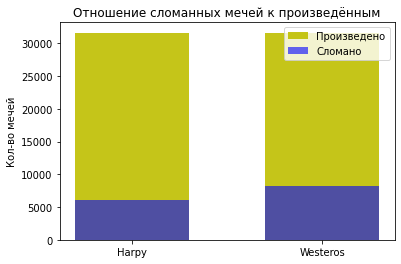

In [30]:
a = np.array([prod_harpy.sum(), prod_westeros.sum()])
d = np.array([defects_harpy.sum(), defects_westeros.sum()])
n = np.array(['Harpy', 'Westeros'])
print('Production: Harpy {} | Westeros {}'.format(a[0], a[1]))
print('Defects: Harpy {} | Westeros {}'.format(d[0], d[1]))
plt.bar(n, a, width=0.6, alpha=0.9, label='Произведено', color='y')
plt.bar(n, d, width=0.6, alpha=0.6, label='Сломано', color='b')
plt.title('Отношение сломанных мечей к произведённым')
plt.ylabel('Кол-во мечей')
plt.legend()
plt.show()

In [31]:
print('Harpy: ', mean_broke_harpy.round())
print('Westeros: ', mean_broke_westeros.round())
fig = go.Figure()
x = np.arange(1, 7)
fig.add_trace(go.Scatter(x=x, y= mean_broke_harpy, name='Harpy'))
fig.add_trace(go.Scatter(x=x, y= mean_broke_westeros, name='Westeros'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Ср. кол-во сломанных мечей после n мес. использования",
                  xaxis_title="Сколько месяцев прошло",
                  yaxis_title="Сломалось",
                  margin=dict(l=0, r=5, t=30, b=0))

fig.show()

Harpy:  [130. 134. 130. 760. 645. 537.]
Westeros:  [447. 413. 376. 356. 334. 281.]


In [32]:
print('Harpy: ', broke_harpy)
print('Westeros: ', broke_westeros)
fig = go.Figure()
x = np.arange(1, 7)
fig.add_trace(go.Scatter(x=x, y= broke_harpy, name='Harpy'))
fig.add_trace(go.Scatter(x=x, y= broke_westeros, name='Westeros'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Общ. кол-во сломанных мечей после n мес. использования",
                  xaxis_title="Сколько месяцев прошло",
                  yaxis_title="Сломалось",
                  margin=dict(l=0, r=5, t=30, b=0))

fig.show()

Harpy:  [ 781.  672.  519. 2281. 1290.  537.]
Westeros:  [2683. 2064. 1505. 1068.  667.  281.]


In [33]:
print('Harpy: ', broke_harpy)
print('Westeros: ', broke_westeros)
fig = go.Figure()
x = np.arange(1, 7)
fig.add_trace(go.Scatter(x=x, y= not_defected_harpy, name='Harpy'))
fig.add_trace(go.Scatter(x=x, y= not_defected_westeros, name='Westeros'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Общ. кол-во целых мечей после n мес. использования",
                  xaxis_title="В какой месяц были изготовлены",
                  yaxis_title="Осталось",
                  margin=dict(l=0, r=5, t=30, b=0))

fig.show()

Harpy:  [ 781.  672.  519. 2281. 1290.  537.]
Westeros:  [2683. 2064. 1505. 1068.  667.  281.]


# a) Boxplot

In [34]:
df_tmp_1 = df_tmp1.drop(columns=['produced'])

In [35]:
df_tmp_11 = df_tmp1.drop(columns=['defects'])

In [36]:
df_tmp_2 = df_tmp2.drop(columns=['produced'])

In [37]:
df_tmp_22 = df_tmp2.drop(columns=['defects'])

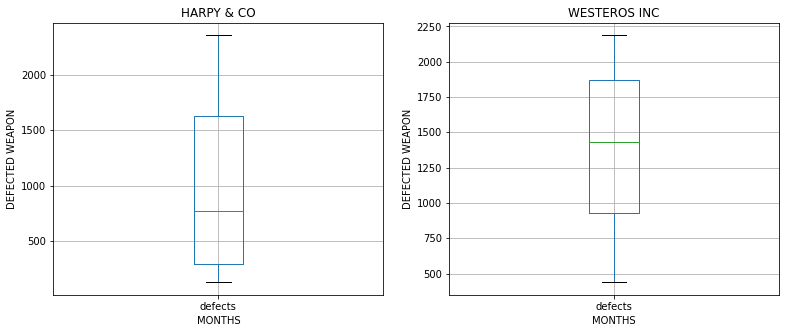

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (13,5)) 

# boxplot_harpy
ax1.set_title('HARPY & CO')
ax1.set_xlabel('MONTHS')
ax1.set_ylabel('DEFECTED WEAPON')
df_tmp_1.boxplot(ax = ax1)

# boxplot_westeros
ax2.set_title('WESTEROS INC')
ax2.set_xlabel('MONTHS')
ax2.set_ylabel('DEFECTED WEAPON')
df_tmp_2.boxplot(ax = ax2)

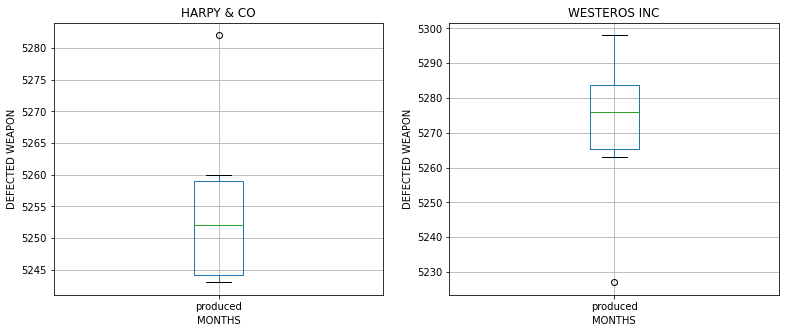

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (13,5)) 

# boxplot_harpy
ax1.set_title('HARPY & CO')
ax1.set_xlabel('MONTHS')
ax1.set_ylabel('DEFECTED WEAPON')
df_tmp_11.boxplot(ax = ax1)

# boxplot_westeros
ax2.set_title('WESTEROS INC')
ax2.set_xlabel('MONTHS')
ax2.set_ylabel('DEFECTED WEAPON')
df_tmp_22.boxplot(ax = ax2)

##b) Pareto chart

In [40]:
from matplotlib.ticker import PercentFormatter
# Add cumulative percentage column
df_tmp_1["cum_percentage"] = round(df_tmp_1.cumsum()/df_tmp_1.sum()*100,2)
df_tmp_1

,defects,cum_percentage
production.date,,
1,2355,38.73
2,1798,68.31
3,1134,86.96
4,408,93.67
5,258,97.91
6,127,100.00


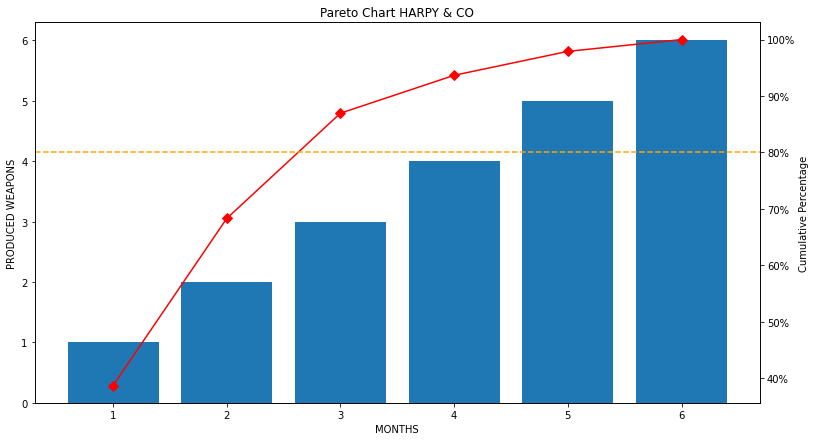

In [42]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(13,7))

# Plot bars (i.e. frequencies)
ax.bar(df_tmp_1.index, x)
ax.set_title('Pareto Chart HARPY & CO')
ax.set_xlabel('MONTHS')
ax.set_ylabel('PRODUCED WEAPONS')

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(df_tmp_1.index, df_tmp_1["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")#Принцип Парето: 20% усилий - 80% результата
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");